<a href="https://colab.research.google.com/github/shivangibithel/assignment2/blob/main/2_class_PCA_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/stonier/opencv2/blob/master/modules/contrib/doc/facerec/facerec_tutorial.rst


#PCA 2 Class

In [70]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2 as cv
import os

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
dataset_path = '/content/drive/MyDrive/dataset/'
dataset_dir  = os.listdir(dataset_path)

width  = 92 
height = 112

## Face dataset

Train Images:


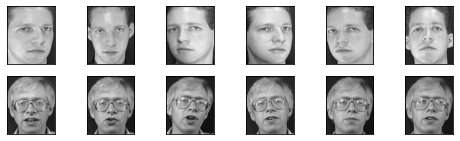

Test Images:


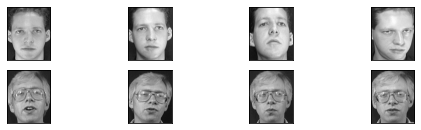

In [113]:
print('Train Images:')

# to store all the training images in an array
pattern_matrix_training   = np.ndarray(shape=(12, height*width), dtype=np.float64)
# pattern_matrix_training   = np.ndarray(shape=(number_of_classes*img_in_class, height*width), dtype=np.float64)

for i in range(12):
    img = plt.imread(dataset_path + 'training/'+str(i+1)+'.pgm')
    # copying images to the training array
    pattern_matrix_training[i,:] = np.array(img, dtype='float64').flatten()
    # plotting the training images
    plt.subplot(10,6,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
    plt.subplots_adjust(right=1.2, top=2.5)
plt.show()

print('Test Images:')
pattern_matrix_testing   = np.ndarray(shape=(8, height*width), dtype=np.float64)

for i in range(8):
    img = imread(dataset_path + 'test/'+str(i+1)+'.pgm')
    pattern_matrix_testing[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(11,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.show()

## Mean Calculation

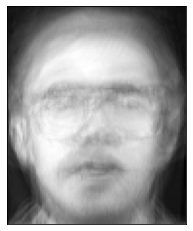

In [74]:
mean_face = np.zeros((1,height*width))

for i in pattern_matrix_training:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(pattern_matrix_training))).flatten()

plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.show()

## Do mean Zero

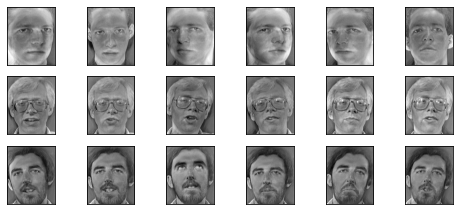

In [75]:
#normalized training set
normalised_pattern_matrix_training = np.ndarray(shape=(len(pattern_matrix_training), height*width))

for i in range(len(pattern_matrix_training)):
    normalised_pattern_matrix_training[i] = np.subtract(pattern_matrix_training[i],mean_face)

for i in range(len(pattern_matrix_training)):
    img = normalised_pattern_matrix_training[i].reshape(height,width)
    plt.subplot(10,6,1+i)
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.show()

## Covariance Matrix

In [76]:
cov_matrix = np.cov(normalised_pattern_matrix_training)
cov_matrix = np.divide(cov_matrix,12.0)
'60 is the number of images'
print('Covariance matrix of X:')
print(cov_matrix)

Covariance matrix of X:
[[103.38540959   4.91807188  -6.76903087  50.85948923  -3.13157989
    7.4521625   -1.3564089   -5.92791944   9.4796348   -8.93132957
    0.38384963   1.83716974 -23.50166563 -30.43969111 -18.54097502
  -29.29541951 -23.47623973 -26.94552772]
 [  4.91807188  84.66242814   8.46631479   7.67556867   2.29450175
   10.39498372  10.0222381    6.42658527   7.06048543  -1.11830808
    5.49591656   7.28693498 -29.70237221 -24.69721495 -11.64764691
  -28.86117042 -27.64332526 -31.03399147]
 [ -6.76903087   8.46631479 154.75326636  62.16441273  79.38445406
   38.01113812  10.8430329    0.49979292 -34.28137217  14.7839804
  -15.34265214 -14.49026407 -48.43235585 -47.69720226 -26.58002528
  -60.29088579 -55.11169258 -59.91091126]
 [ 50.85948923   7.67556867  62.16441273 119.51175078   9.30787407
   18.46577725   8.27406569   1.2302667  -15.95389638   8.34478285
   -3.89138808  -2.11201828 -58.22728292 -47.00602657 -12.37644586
  -56.42185128 -38.08783705 -51.75724157]
 [ -3

## Eigenvalues and eigenvectors

In [77]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X):')
print(eigenvectors)
print('Eigenvalues of Cov(X):',eigenvalues)

Eigenvectors of Cov(X):
[[-1.34809059e-01 -9.66622343e-02 -3.63348269e-01  6.11934357e-01
  -1.25229931e-01 -3.61150426e-02 -2.35702260e-01 -1.48720769e-01
  -2.06523642e-01  1.70884186e-02 -2.39745233e-01  3.00434282e-01
   2.66476447e-01 -7.33163725e-02  1.31248124e-01  2.93043176e-01
  -2.04174288e-02 -2.74273419e-02]
 [-1.32764072e-01 -1.10230938e-01 -3.67247791e-02 -4.39926374e-02
  -1.27080339e-01  5.00499559e-01 -2.35702260e-01  6.37717459e-01
  -2.54967019e-01 -4.83408627e-03  5.32410073e-02  1.46625074e-02
  -2.77594033e-01  2.88116366e-04 -5.99657261e-02  2.21818002e-01
   1.74718818e-01 -9.79029738e-02]
 [-3.57422052e-01  5.02422152e-01  1.04526163e-01 -1.31820377e-01
   2.65339102e-01 -5.59497422e-02 -2.35702260e-01 -2.05026854e-02
  -1.42246704e-02 -3.28872531e-02 -3.81386572e-01  4.11127733e-01
  -3.17453223e-01 -9.77979117e-02 -1.66015554e-02 -1.63248535e-01
  -9.44950022e-02  6.80987987e-03]
 [-2.91617807e-01  1.26110539e-01 -4.06374201e-01  2.64989201e-01
   5.03131854

## Feature vector --> choice of k

Cumulative proportion of variance explained vector: [0.30845813 0.43479869 0.53310915 0.60785222 0.67621878 0.7314772
 0.77612841 0.81367656 0.84636626 0.87624648 0.90193437 0.92509186
 0.94685574 0.96594784 0.97970043 0.99249496 1.         1.        ]


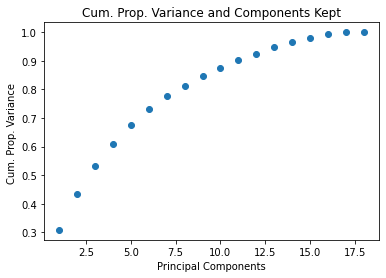

In [78]:
# get corresponding eigenvectors to eigen values
# so as to get the eigenvectors at the same corresponding index to eigen values when sorted
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Find cumulative variance of each principle component
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector:", var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance ')

plt.scatter(num_comp, var_comp_sum)
plt.show()

In [79]:
print('Number of eigen vectors:',len(eigvalues_sort))

# Choosing the necessary number of principle components
number_chosen_components = 2 #30// Remove hard coding
print("k:",number_chosen_components)
reduced_data = np.array(eigvectors_sort[:number_chosen_components]).transpose()

Number of eigen vectors: 18
k: 2


## Eigenfaces

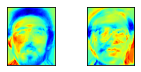

(2, 10304)

In [80]:
# get projected data ---> eigen space

proj_data = np.dot(pattern_matrix_training.transpose(),reduced_data)
proj_data = proj_data.transpose()

# plotting of eigen faces --> the information retained after applying lossing transformation
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(10,6,1+i)
    plt.imshow(img, cmap='jet')
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.show()

proj_data.shape

## Signature of Each Face

In [81]:
print(normalised_pattern_matrix_training.shape)
print(proj_data.shape)

w = np.array([np.dot(proj_data,img) for img in normalised_pattern_matrix_training])
w.shape

(18, 10304)
(2, 10304)


(18, 2)

## Testing

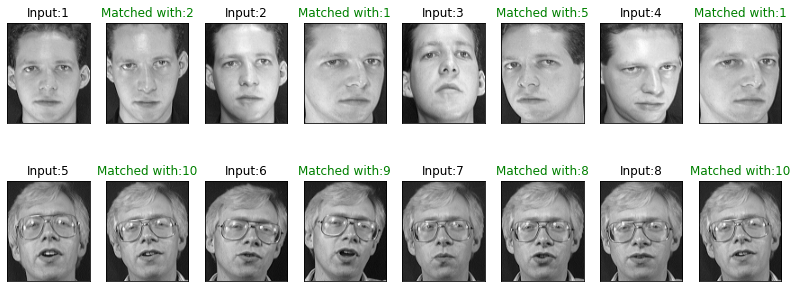

Correct predictions: 8/8 = 100.0%


In [82]:
# Testing all the images

count=0
num_images=0
correct_pred=0
def recogniser(img_number,proj_data,w):
    global count,highest_min,num_images,correct_pred
    
    num_images          += 1
    unknown_face_vector = pattern_matrix_testing[img_number,:]
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(11,8,1+count)
    plt.imshow(unknown_face_vector.reshape(height,width), cmap='gray')
    plt.title('Input:'+str(img_number+1))
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
    count+=1
    
    w_unknown = np.dot(proj_data, normalised_uface_vector) # w_known --> projected test face
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    # print('norms::', norms[0])
    
    index = np.argmin(norms)
    
    # print('index::', index)
    # print('min::', np.min(norms))
    
    plt.subplot(11,8,1+count)
    
    set_number = int(img_number/4) #???
    #print('set what', set_number)
#     print(set_number)

    t0 = 15000000
    
#     if(img_number>=40):
#         print(norms[index])
    
    # if norms[index] < t0:
    # 1st Subject > 0 and < 6
    # 2nd Subject > 6 and 12
    if(index>=(6*set_number) and index<(6*(set_number+1))):
        plt.title('Matched with:'+str(index+1), color='g')
        plt.imshow(pattern_matrix_training[index,:].reshape(height,width), cmap='gray')
        correct_pred += 1
    else:
        plt.title('Matched with:'+str(index+1), color='r')
        plt.imshow(pattern_matrix_training[index,:].reshape(height,width), cmap='gray')
    # else:
    #     if(img_number>=40):
    #         plt.title('Unknown face!', color='g')
    #         correct_pred += 1
    #     else:
    #         plt.title('Unknown face!', color='r')
    plt.subplots_adjust(right=1.2, top=2.5)
    plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
    count+=1

fig = plt.figure(figsize=(10, 10))
for i in range(len(pattern_matrix_testing)):
    recogniser(i,proj_data,w)

plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))

## Plotting of Accuracy vs k-value for eigenvectors

Total Number of eigenvectors: 18


Text(0.5, 1.0, 'Accuracy vs. k-value')

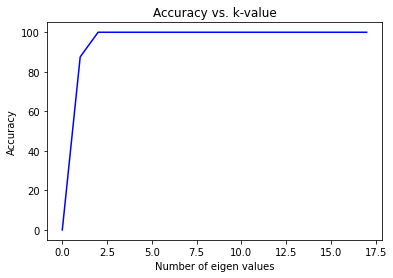

In [83]:
accuracy = np.zeros(len(eigvalues_sort))

def tester(img_number,proj_data,w,num_images,correct_pred):
    
    num_images          += 1
    unknown_face_vector = pattern_matrix_testing[img_number,:]
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    set_number = int(img_number/4)

    t0 = 15000000
    
    # if norms[index] < t0:
    if(index>=(6*set_number) and index<(6*(set_number+1))):
      correct_pred += 1
    # else:
    #     if(img_number>=40):
    #         correct_pred += 1
    
    return num_images,correct_pred

def calculate(k):
    
#     print("k:",k)
    reduced_data = np.array(eigvectors_sort[:k]).transpose()
    
    proj_data = np.dot(pattern_matrix_training.transpose(),reduced_data)
    proj_data = proj_data.transpose()
    
    w = np.array([np.dot(proj_data,img) for img in normalised_pattern_matrix_training])
    
    num_images=0
    correct_pred=0
    
    for i in range(len(pattern_matrix_testing)):
        num_images,correct_pred = tester(i,proj_data,w,num_images,correct_pred)
    
    accuracy[k] = correct_pred/num_images*100.00
    
print('Total Number of eigenvectors:',len(eigvalues_sort))
for i in range(1,len(eigvalues_sort)):
    calculate(i)
    
fig, axi = plt.subplots()  
axi.plot(np.arange(len(eigvalues_sort)), accuracy, 'b')  
axi.set_xlabel('Number of eigen values')  
axi.set_ylabel('Accuracy')  
axi.set_title('Accuracy vs. k-value') 

# Plot Decision Boundary PCA

In [131]:
len(pattern_matrix_training)
pattern_matrix_training=np.array(pattern_matrix_training)
print(pattern_matrix_training)
y=[0,0,0,0,0,0,1,1,1,1,1,1]
y=np.array(y)
print(y)

[[ 60.  60.  62. ...  32.  34.  34.]
 [ 39.  44.  53. ...  29.  26.  29.]
 [ 63.  53.  35. ...  41.  10.  24.]
 ...
 [ 35.  36.  37. ... 144. 147. 143.]
 [ 37.  35.  35. ...  26.  28.  28.]
 [ 34.  36.  35. ...  32.  25.  25.]]
[0 0 0 0 0 0 1 1 1 1 1 1]


In [132]:
pca = PCA(n_components=2)
X_r = pca.fit(pattern_matrix_training).transform(pattern_matrix_training)
print(len(pattern_matrix_training),len(pattern_matrix_training[0]))

12 10304


In [133]:
target_names=['subject0','subject1']
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.40013892 0.16100826]


In [134]:
y=[0,0,0,0,0,0,1,1,1,1,1,1]
y=np.array(y)
print(y)

[0 0 0 0 0 0 1 1 1 1 1 1]


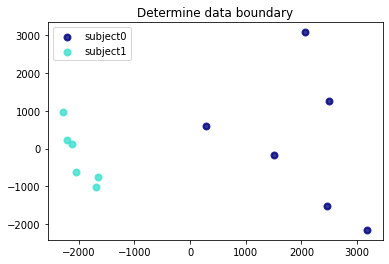

In [135]:
plt.figure()
colors = ['navy', 'turquoise']
lw = 2
# for i in [0, 1]:
#     plt.scatter(X_r[y == i, 0], X_r[y == i, 1])
                
# for i in range(12):
#     plt.scatter(X_r[i], X_r[i])
               
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Determine data boundary')
plt.show()

# Plot decision boundary LDA

https://melaniesoek0120.medium.com/principal-component-analysis-pca-facial-recognition-5e1021f55151


In [89]:
print("Number of features:", len(pattern_matrix_training[0]))

Number of features: 10304


In [114]:
#### Labels ######
x1=[0,0,0,0,0,0,1,1,1,1,1,1]
x1=np.array(x1)
print(x1)

[0 0 0 0 0 0 1 1 1 1 1 1]


In [116]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
print(pattern_matrix_training.shape)
lda_object = lda.fit_transform(pattern_matrix_training, x1)
print(pattern_matrix_training.shape)
print(lda.explained_variance_ratio_)
print(lda_object)
print(lda)

(12, 10304)
(12, 10304)
[1.]
[[-1.62703869]
 [-0.05029467]
 [-3.48631712]
 [-1.8977036 ]
 [-0.41711566]
 [-0.74150626]
 [ 0.49334207]
 [ 2.19070353]
 [ 1.26166761]
 [ 1.27393601]
 [ 0.93664138]
 [ 2.0636854 ]]
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


No handles with labels found to put in legend.


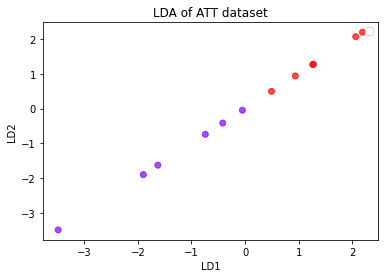

In [128]:
plt.figure()
colors = ['navy', 'turquoise', 'orange']
target_names=['subject0','subject1']
# for color, i, target_name in zip(colors, [0, 1,2], target_names):
#     plt.scatter(lda_object[x1 == i, 0], lda_object[x1 == i, 1],  alpha=.8, color=color,
#                 label=target_name)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    lda_object[:,0],
    lda_object[:,0],
    c=x1,
    cmap='rainbow',
    alpha=0.7
)
plt.legend(target_names)

x2 = np.array([np.min(pattern_matrix_training[:,0], axis=0), np.max(pattern_matrix_training[:,0], axis=0)])
for i, c in enumerate(colors):
    b, w1,w2 = lda.intercept_[i], lda.coef_[i][0],lda.coef_[i][1]
    y1 = -(b+x2*w1) /w2  
    plt.plot(x2,y1,c=c)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('LDA of ATT dataset')

plt.show()

[[-7.12390662e-01  7.53766379e-01]
 [-4.45030783e-02  4.51812339e-01]
 [ 1.34510171e+00  5.32337888e-01]
 [ 1.35018790e+00  8.61211374e-01]
 [ 1.47868574e+00 -1.04537713e+00]
 [-7.88989025e-01 -1.26160595e+00]
 [ 5.62846785e-01 -2.43326252e-01]
 [ 9.13740705e-01  3.17350923e-01]
 [ 1.27303280e-01  2.15038297e+00]
 [ 6.06288657e-01 -2.67716500e-02]
 [-9.84160782e-01  1.19070527e+00]
 [ 9.52830611e-01 -1.08718159e+00]
 [-1.45211333e-01  2.37857838e-01]
 [-1.63909341e+00 -2.78134517e-01]
 [ 1.39923842e+00 -1.61510796e+00]
 [ 4.90871833e-01  1.89274222e+00]
 [-6.20979702e-01 -4.53752381e-01]
 [ 2.17451659e-01  5.14328855e-01]
 [ 3.97241326e-01 -1.51284512e+00]
 [-7.64033970e-01  1.01269786e-01]
 [-3.17265971e-01  1.13833305e+00]
 [-3.22123657e-01 -3.70116078e-01]
 [ 1.84961257e+00 -8.16515562e-02]
 [-9.80274319e-01 -2.38902560e-03]
 [-2.32425872e-01  7.10974795e-01]
 [ 4.53158613e-01  9.66732422e+00]
 [-3.84457685e-01  9.46967259e+00]
 [ 1.35030600e+00  1.20152208e+01]
 [-5.75323879e-02  1

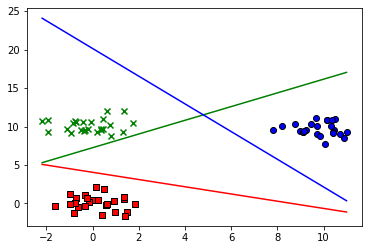

In [93]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(13)

# Generate 3 linearly separable dataset of 2 features
X = [[0,0]]*25+[[0,10]]*25+[[10,10]]*25
X = np.array(list(map(lambda x: list(map(lambda y: np.random.randn()+y, x)), X)))
y = np.array([0]*25+[1]*25+[2]*25)

print(X)
print

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda_object = lda.fit(X, y)

# Plot the hyperplanes
for l,c,m in zip(np.unique(y),['r','g','b'],['s','x','o']):
    plt.scatter(X[y==l,0],
                X[y==l,1],
                c=c, marker=m, label=l,edgecolors='black')

x1 = np.array([np.min(X[:,0], axis=0), np.max(X[:,0], axis=0)])

for i, c in enumerate(['r','g','b']):
    b, w1, w2 = lda.intercept_[i], lda.coef_[i][0], lda.coef_[i][1]
    y1 = -(b+x1*w1)/w2    
    plt.plot(x1,y1,c=c)

# K-means

In [94]:
#Importing required modules
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data=pattern_matrix_training
pca = PCA(2)

#Transform the data
df = pca.fit_transform(data)
 
df.shape

(18, 2)

In [95]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]


Plot for Label 0 

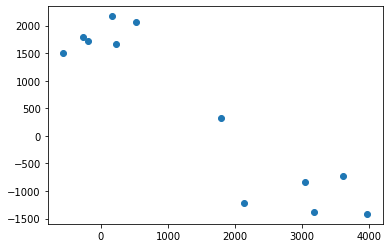

In [96]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

Plot for label 1

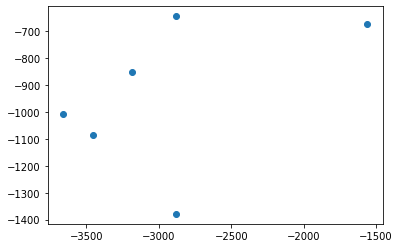

In [97]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[label == 1]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

Plot for label 0 and label 1

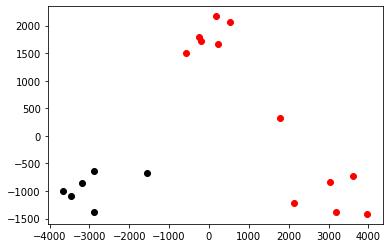

In [98]:
#filter rows of original data
filtered_label0 = df[label == 0] 
filtered_label1 = df[label == 1]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.show()

Plot with centroids

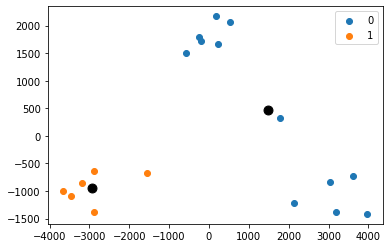

In [99]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

[[-8.00380133  1.23246427]
 [-7.76609222  1.97686347]
 [-6.66341569  3.0036874 ]
 [-6.37747076  2.76546537]
 [-7.91767952  4.26999911]
 [-9.78989338  2.65680649]
 [-7.91074953  2.96350494]
 [-7.16871334  2.82485828]
 [-6.18098908  0.86024383]
 [-7.69264127  2.83797877]
 [-7.83106591  0.69826476]
 [-8.34467748  3.8897731 ]
 [-8.02456445  2.05571492]
 [-9.57841758  1.26808463]
 [-8.46558137  4.62747821]
 [-6.13161333  1.33415043]
 [-8.97181821  2.19318375]
 [-7.51761325  2.13556945]
 [-9.1231292   3.76899795]
 [-8.60203263  1.6726277 ]
 [-7.37996286  1.25808456]
 [-8.677772    2.36517852]
 [-6.81494158  3.85018711]
 [-8.85180786  1.57995153]
 [-7.68351703  1.6391224 ]
 [ 0.51065193 -4.42088347]
 [-0.28194543 -4.93001163]
 [ 3.19236267 -5.44876383]
 [ 0.90067727 -5.48087859]
 [ 0.28718876 -4.36202574]
 [-0.34311288 -5.07447923]
 [-1.62204199 -5.96618947]
 [ 1.58765446 -5.34488539]
 [-0.01773633 -4.90529525]
 [ 2.69695852 -6.03236841]
 [-0.89611046 -5.17517312]
 [ 0.60396193 -5.76526233]
 

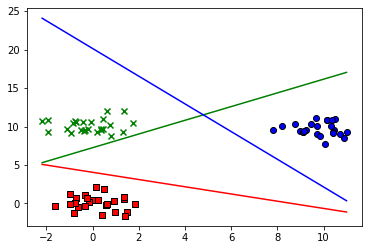

In [100]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(13)

# Generate 3 linearly separable dataset of 2 features
X = [[0,0]]*25+[[0,10]]*25+[[10,10]]*25
X = np.array(list(map(lambda x: list(map(lambda y: np.random.randn()+y, x)), X)))
y = np.array([0]*25+[1]*25+[2]*25)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda_object = lda.fit(X, y).transform(X)

print(lda_object)

# Plot the hyperplanes
for l,c,m in zip(np.unique(y),['r','g','b'],['s','x','o']):
    plt.scatter(X[y==l,0],
                X[y==l,1],
                c=c, marker=m, label=l,edgecolors='black')

x1 = np.array([np.min(X[:,0], axis=0), np.max(X[:,0], axis=0)])

for i, c in enumerate(['r','g','b']):
    b, w1, w2 = lda.intercept_[i], lda.coef_[i][0], lda.coef_[i][1]
    y1 = -(b+x1*w1)/w2    
    plt.plot(x1,y1,c=c)